In [1]:
%pylab inline
import tensorflow as tf
from itertools import groupby
import pandas as pd
from collections import OrderedDict
from datetime import date
import pyodbc
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


C:\Users\Vivi\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
#Data = pd.read_csv('MasernAndCoords.csv',encoding='latin-1')
Data = pd.read_csv('StomachVirusInput.csv',encoding='latin-1')
Data.columns=['ID','week','year','county','count','incidence','X','Y','BinX','BinY']
Data

,ID,week,year,county,count,incidence,X,Y,BinX,BinY
0,0,1,2001,LK Altenkirchen,1.0,19.892800,[7.7270285],[50.73946897],[3],[7]
1,1,1,2001,LK Ammerland,1.0,34.366229,[8.03291064],[53.22147688],[4],[12]
2,2,1,2001,LK Anhalt-Bitterfeld,1.0,18.432613,[12.17414403],[51.77891857],[11],[9]
3,3,1,2001,LK Bad Dürkheim,5.0,101.440870,[8.0989165],[49.43943465],[4],[4]
4,4,1,2001,LK Barnim,1.0,24.270536,[13.72397933],[52.82678413],[13],[11]
5,5,1,2001,LK Bautzen,2.0,21.857354,[14.20996868],[51.3147493],[14],[8]
6,6,1,2001,LK Bernkastel-Wittlich,1.0,22.757731,[6.94707509],[49.9288013],[2],[5]
7,7,1,2001,LK Biberach,2.0,37.901348,[9.7384129],[48.12156599],[7],[2]
8,8,1,2001,LK Birkenfeld,1.0,39.433904,[7.31217013],[49.7137353],[2],[5]
9,9,1,2001,LK Bitburg-Prüm,1.0,24.896610,[6.41060344],[50.07655585],[1],[6]


In [129]:
allMaps = []
for m in range(15):
    for n in range(52):
        year = 2001+m
        thisweek = Data[Data['year']==year][Data[Data['year']==year]['week']==n]
        thisweek = thisweek.reset_index(drop=True)
        currentMap = np.zeros((16,16))
        currentCount = np.zeros((16,16))
        for i in range(shape(thisweek)[0]):
            inc = thisweek['incidence'][i]
            x = int(thisweek['BinX'][i][1:-1])
            y = int(thisweek['BinY'][i][1:-1])
            currentMap[x][y]=currentMap[x][y]+inc
            currentCount[x][y]=currentCount[x][y]+1
        currentMap = currentMap/currentCount
        allMaps.append(np.nan_to_num(currentMap))
    #plt.imshow(currentMap, cmap='hot', interpolation='nearest',animated=True)
    #plt.show()

C:\Users\Vivi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [130]:
shape(allMaps)

(780, 16, 16)

spread of stomach virus during week 13 in 2001:


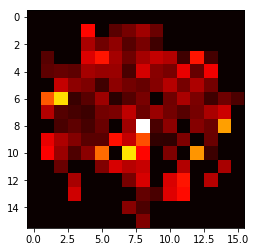

In [131]:
plt.imshow(allMaps[13], cmap='hot', interpolation='nearest',animated=True)
print("spread of stomach virus during week 13 in 2001:")
plt.show()

In [69]:
lenall = shape(allMaps)[0]
trainSize = lenall//3*2#define sizes for data sets (train: 2/3, val:1/6, test:1/6 of whole dataset) 
valSize = lenall//6

#Split data into train, val and test set------------------------------------------
trainingData = allMaps[0:trainSize]
validationData = allMaps[trainSize+1:trainSize+valSize]
testData = allMaps[trainSize+valSize+1:]
shape(testData)

(127, 16, 16)

In [78]:
#Method to get batches------------------------------------------------------------
def getBatches(batchsize,numIn,typeBatch):
    if typeBatch=="train":
        Batches=[]
        Labels=[]
        batchsize = batchsize+numIn
        rand = np.random.randint(0,trainSize-(batchsize+1))
        batch = trainingData[rand:rand+(batchsize+1)]#trainingData[count*batchsize:(count+1)*batchsize]
        for i,e in enumerate(batch):
            if i<batchsize-(numIn):
                inp = batch[i:i+numIn]
                tar = batch[i+numIn+1]
                Batches.append(inp)
                Labels.append(tar)
    elif typeBatch=="val":
        Batches=[]
        Labels=[]
        batchsize = batchsize+numIn
        rand = np.random.randint(0,valSize-(batchsize+1))
        batch = validationData[rand:rand+(batchsize+1)]#trainingData[count*batchsize:(count+1)*batchsize]
        for i,e in enumerate(batch):
            if i<batchsize-(numIn):
                inp = batch[i:i+numIn]
                tar = batch[i+numIn+1]
                Batches.append(inp)
                Labels.append(tar)
    elif typeBatch=="test":
        Batches=[]
        Labels=[]
        batchsize = batchsize+numIn
        testSize = lenall-trainSize-valSize
        rand = np.random.randint(0,testSize-(batchsize+1))
        batch = testData[rand:rand+(batchsize+1)]
        for i,e in enumerate(batch):
            if i<batchsize-(numIn):
                inp = batch[i:i+numIn]
                tar = batch[i+numIn+1]
                Batches.append(inp)
                Labels.append(tar)
    else:
        print("typeBatch needs to be set to one of these values: train, val, test.")
        pass
    return Batches,Labels       

In [82]:
b,l = getBatches(50,3,'train')
print(shape(b))

(50, 3, 16, 16)


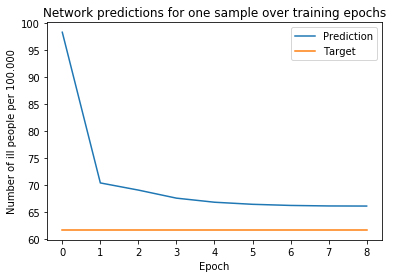

In [97]:
a = np.multiply([0.9823748,0.70424765, 0.69103467, 0.67615378, 0.66862941, 0.66479069,
       0.66269767, 0.66174453, 0.66155505],100)
b = np.multiply([0.61751538,0.61751538, 0.61751538, 0.61751538, 0.61751538, 0.61751538,
       0.61751538, 0.61751538, 0.61751538],100)
plt.plot(a)
plt.plot(b)
plt.legend(['Prediction', 'Target'])
plt.xlabel('Epoch')
plt.ylabel('Number of ill people per 100.000')
plt.title('Network predictions for one sample over training epochs')
plt.show()

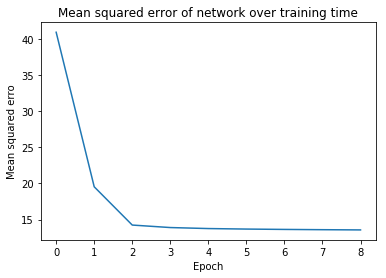

In [120]:
loss = np.multiply([0.40918556,0.19540015, 0.14247412, 0.13903136, 0.13763657, 0.13692768,
       0.13644582, 0.13606944, 0.13575951],100)
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Mean squared erro')
plt.title('Mean squared error of network over training time')
plt.show()

19.87970720505798


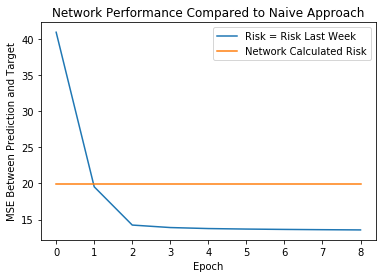

In [121]:

print(np.mean(mses)*100)
mse = np.mean(mses)*100
mseplot = [mse,mse,mse,mse,mse,mse,mse,mse,mse]
plt.plot(loss)
plt.plot(mseplot)
plt.legend(['Risk = Risk Last Week', 'Network Calculated Risk'])
plt.xlabel('Epoch')
plt.ylabel('MSE Between Prediction and Target')
plt.title('Network Performance Compared to Naive Approach')
plt.show()